# Data Collection

## Importing Required Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining Historical Dataset

In [2]:
# Define the API endpoint and parameters
# api_url = "https://archive-api.open-meteo.com/v1/archive?latitude=30.3229&longitude=78.0317&start_date=2000-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m"

api_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 30.3229,
	"longitude": 78.0317,
	"start_date": "2000-01-01",
	"end_date": "2023-12-31",

	"hourly": [
        "temperature_2m", 
        "relative_humidity_2m", 
        "dew_point_2m", 
        "apparent_temperature", 
        "precipitation", 
        "rain", 
        "pressure_msl", 
        "surface_pressure", 
        "cloud_cover", 
        "cloud_cover_low", 
        "cloud_cover_mid", 
        "cloud_cover_high", 
        "et0_fao_evapotranspiration", 
        "vapour_pressure_deficit", 
        "wind_speed_10m", 
        "wind_speed_100m", 
        "wind_direction_10m", 
        "wind_direction_100m", 
        "wind_gusts_10m"
    ]
}

# Make an API request to fetch weather data
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Create a DataFrame from the data
    df_hist = pd.DataFrame(data["hourly"])
    
    print("Data fetched")
else:
    print("Failed to fetch data. Check the API URL and parameters.")

Data fetched


In [3]:
df_hist

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2000-01-01T00:00,4.0,96,3.3,1.9,0.0,0.0,1017.5,938.5,0,0,0,0,0.00,0.04,3.8,3.6,41,360,11.5
1,2000-01-01T01:00,4.1,95,3.3,1.9,0.0,0.0,1017.9,938.9,1,0,1,0,0.00,0.04,4.1,4.4,38,351,11.9
2,2000-01-01T02:00,4.0,95,3.2,1.9,0.0,0.0,1018.8,939.7,1,0,1,0,0.01,0.04,3.8,4.5,41,346,11.9
3,2000-01-01T03:00,6.5,92,5.3,4.7,0.0,0.0,1019.4,940.9,2,0,3,0,0.02,0.07,4.3,4.0,42,355,13.0
4,2000-01-01T04:00,12.9,75,8.6,12.2,0.0,0.0,1020.0,943.1,0,0,0,0,0.13,0.37,2.0,2.5,45,8,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2023-12-31T19:00,8.6,87,6.5,6.6,0.0,0.0,1017.5,939.7,0,0,0,0,0.00,0.15,7.5,7.5,343,325,9.7
210380,2023-12-31T20:00,8.7,85,6.4,6.6,0.0,0.0,1017.3,939.5,0,0,0,0,0.00,0.16,8.2,9.3,322,306,11.2
210381,2023-12-31T21:00,8.6,86,6.5,6.7,0.0,0.0,1017.4,939.6,0,0,0,0,0.00,0.15,7.2,10.4,323,304,11.5
210382,2023-12-31T22:00,8.2,86,6.1,6.1,0.0,0.0,1017.3,939.4,0,0,0,0,0.00,0.15,8.2,10.9,331,314,11.5


In [4]:
df_hist.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000
mean,20.436684,69.367124,13.623561,21.477364,0.151247,0.151242,1009.069268,934.837595,24.527212,9.976082,15.457611,26.250608,0.152360,0.922731,5.364997,7.434976,140.434800,169.426953,15.281371
std,7.438316,21.302657,6.806465,9.291649,0.769278,0.769266,6.535547,4.938951,30.595767,21.941953,25.201355,36.718218,0.202741,0.976963,2.772204,4.604150,108.354197,108.512678,7.116790
min,-1.200000,9.000000,-7.100000,-4.800000,0.000000,0.000000,989.000000,917.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.400000
25%,14.900000,54.000000,8.100000,14.100000,0.000000,0.000000,1003.600000,930.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,3.600000,4.200000,42.000000,63.000000,10.100000
50%,21.900000,74.000000,12.300000,22.800000,0.000000,0.000000,1009.300000,935.200000,10.000000,0.000000,2.000000,1.000000,0.040000,0.600000,4.800000,6.500000,96.000000,163.000000,13.700000
75%,25.800000,88.000000,20.900000,29.300000,0.000000,0.000000,1014.700000,938.700000,38.000000,7.000000,20.000000,51.000000,0.280000,1.240000,6.700000,9.500000,245.000000,267.000000,19.100000
max,40.400000,100.000000,26.500000,41.500000,39.100000,39.100000,1025.800000,949.000000,100.000000,100.000000,100.000000,100.000000,0.970000,6.760000,32.100000,45.700000,360.000000,360.000000,68.400000


In [5]:
df_hist['time'] = pd.to_datetime(df_hist['time'])
df_hist['hour'] = df_hist['time'].dt.hour
# df_hist['date'] = df_hist['time'].dt.date
df_hist['month'] = df_hist['time'].dt.month
df_hist['year'] = df_hist['time'].dt.year
df_hist

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,...,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,hour,month,year
0,2000-01-01 00:00:00,4.0,96,3.3,1.9,0.0,0.0,1017.5,938.5,0,...,0.00,0.04,3.8,3.6,41,360,11.5,0,1,2000
1,2000-01-01 01:00:00,4.1,95,3.3,1.9,0.0,0.0,1017.9,938.9,1,...,0.00,0.04,4.1,4.4,38,351,11.9,1,1,2000
2,2000-01-01 02:00:00,4.0,95,3.2,1.9,0.0,0.0,1018.8,939.7,1,...,0.01,0.04,3.8,4.5,41,346,11.9,2,1,2000
3,2000-01-01 03:00:00,6.5,92,5.3,4.7,0.0,0.0,1019.4,940.9,2,...,0.02,0.07,4.3,4.0,42,355,13.0,3,1,2000
4,2000-01-01 04:00:00,12.9,75,8.6,12.2,0.0,0.0,1020.0,943.1,0,...,0.13,0.37,2.0,2.5,45,8,13.0,4,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2023-12-31 19:00:00,8.6,87,6.5,6.6,0.0,0.0,1017.5,939.7,0,...,0.00,0.15,7.5,7.5,343,325,9.7,19,12,2023
210380,2023-12-31 20:00:00,8.7,85,6.4,6.6,0.0,0.0,1017.3,939.5,0,...,0.00,0.16,8.2,9.3,322,306,11.2,20,12,2023
210381,2023-12-31 21:00:00,8.6,86,6.5,6.7,0.0,0.0,1017.4,939.6,0,...,0.00,0.15,7.2,10.4,323,304,11.5,21,12,2023
210382,2023-12-31 22:00:00,8.2,86,6.1,6.1,0.0,0.0,1017.3,939.4,0,...,0.00,0.15,8.2,10.9,331,314,11.5,22,12,2023


In [6]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time                        210384 non-null  datetime64[ns]
 1   temperature_2m              210384 non-null  float64       
 2   relative_humidity_2m        210384 non-null  int64         
 3   dew_point_2m                210384 non-null  float64       
 4   apparent_temperature        210384 non-null  float64       
 5   precipitation               210384 non-null  float64       
 6   rain                        210384 non-null  float64       
 7   pressure_msl                210384 non-null  float64       
 8   surface_pressure            210384 non-null  float64       
 9   cloud_cover                 210384 non-null  int64         
 10  cloud_cover_low             210384 non-null  int64         
 11  cloud_cover_mid             210384 non-

# EDA

**Cloudburst phenomena**

1. moisture-laden clouds do not cause any rainfall due to the upward movements of an extremely hot air current.
2. hot air current, the raindrops become bigger in size, and instead of falling down, they continue to move up.
3. high relative humidity, along with low temperature and slow wind speeds, results in condensation of clouds at lightning speed.
4. rain over a limited geographical area within minutes.
5. formation of cumulonimbus clouds.

**Cloudbursts properties**

1. rainfall amounting to more than 10 cm or 100 mm within a span of 60 minutes
2. intense rainfall is 20 to 25 square kilometers
3. Cloudbursts follow the Langmuir precipitation process as small rainfall droplets amalgamate to form large droplets. 
4. consequence: flash floods

**Detection And Forecasting of Cloudbursts**

1. Tall cumulonimbus clouds forming very quickly (difficult to track or predict cloudburst events)
2. resolution of rainfall radars is quite smaller as compared to the area covered by a cloudburst

**Recent Cloudburst in India**

1. 4th May 2018: Belagavi, Karnataka where the weather station recorded 95 mm of rainfall within an hour
2. 12th May 2021: Uttrakhand reported in Chamoli and Tehri districts
3. 28th July 2021: Kishwar district of Jammu and Kashmir
4. 8th July 2022: Pahalgam area on the route to Shri Amarnath Shrine in Jammu and Kashmir
5. August 2022: Himachal Pradesh + flash floods

Time Series Plot

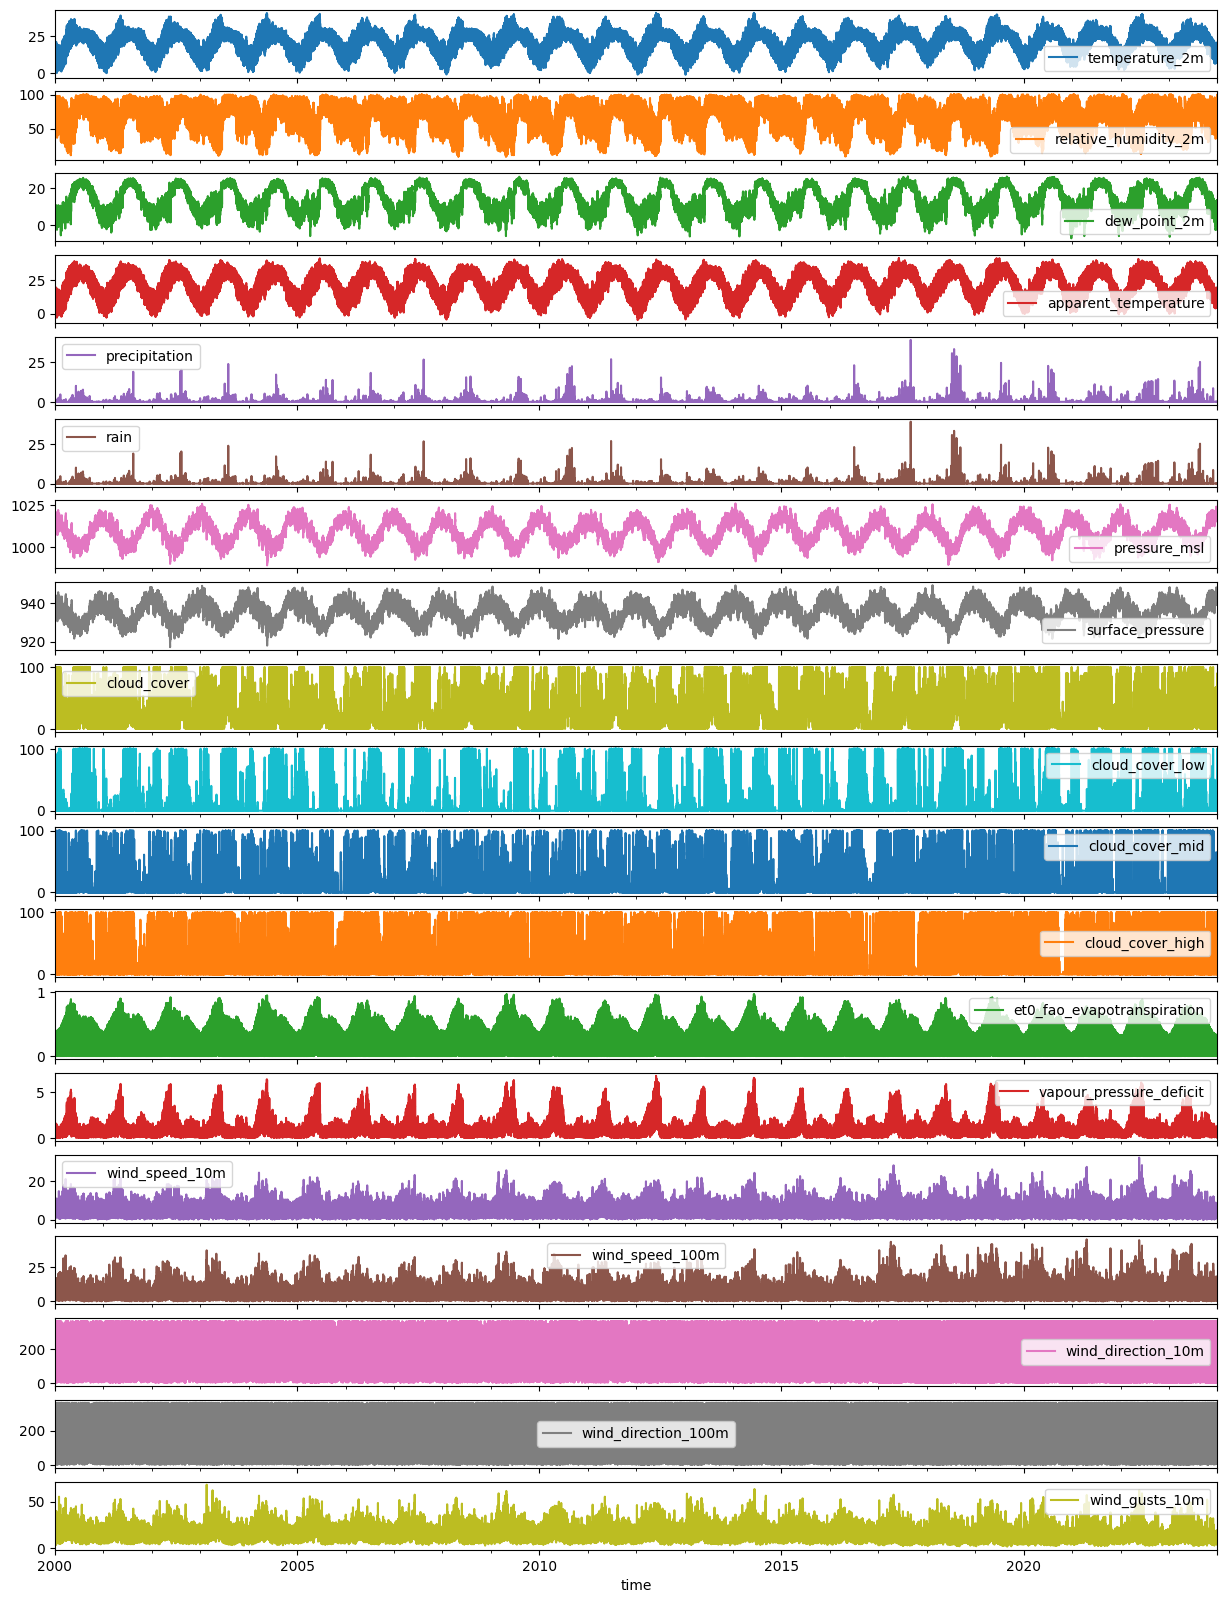

In [7]:
df_hist.set_index('time')[['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']].plot(subplots=True, figsize=(15, 20))
plt.show()

Correlation Heatmap

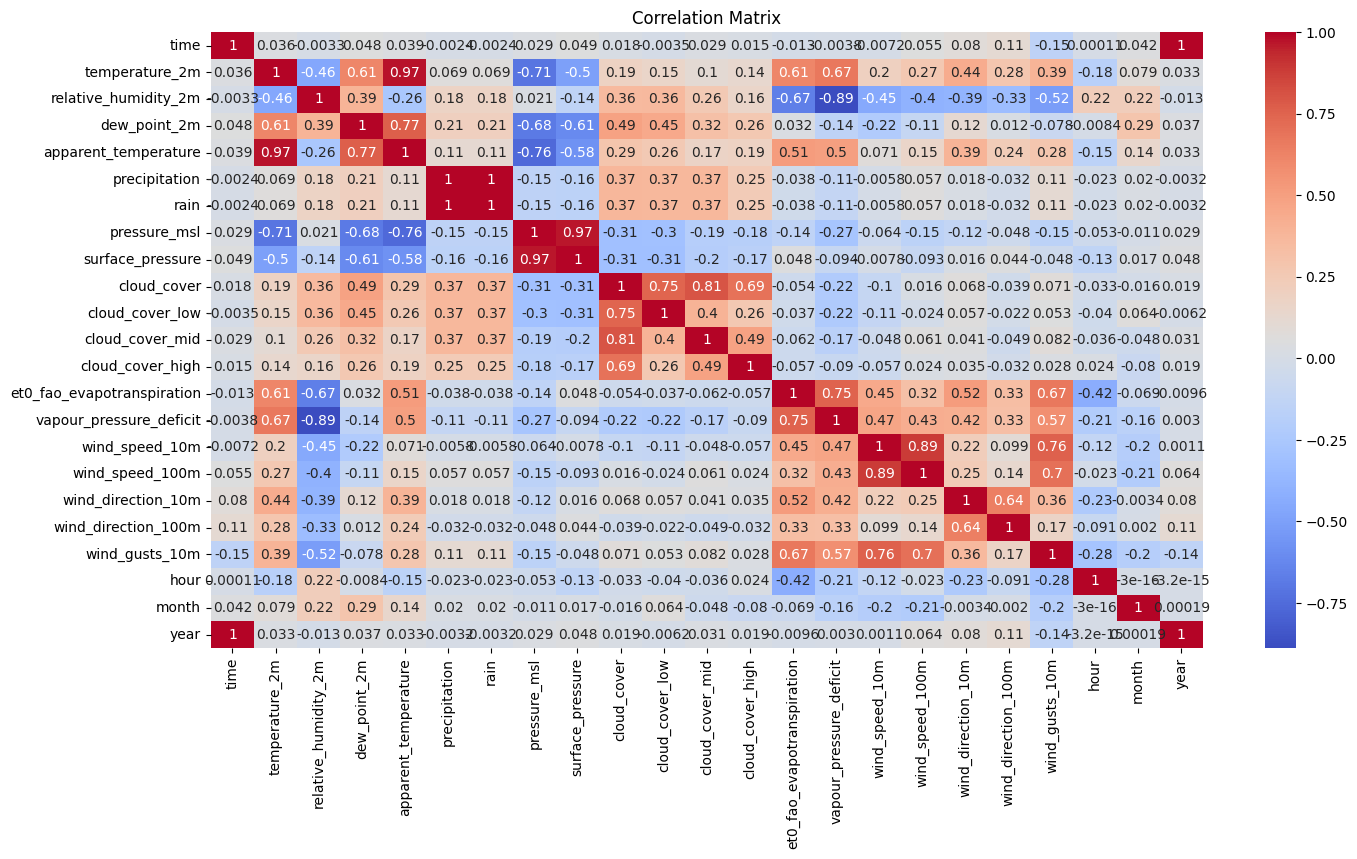

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Distribution Plot

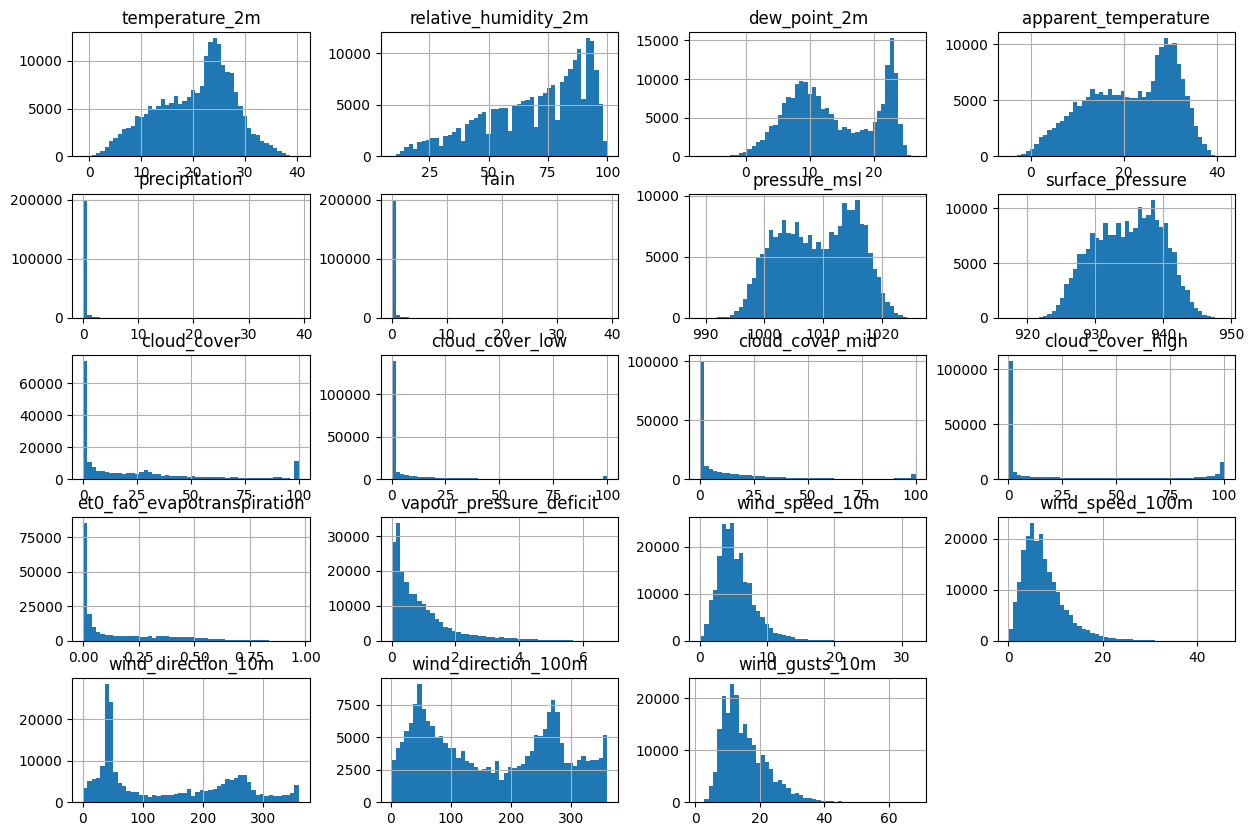

In [9]:
df_hist[['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']].hist(bins=50, figsize=(15, 10))
plt.show()

In [10]:
df_hist01 = df_hist.drop(['cloud_cover', 'cloud_cover_high', 'wind_direction_10m', 'wind_direction_100m'], axis='columns')
df_hist01

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m,hour,month,year
0,2000-01-01 00:00:00,4.0,96,3.3,1.9,0.0,0.0,1017.5,938.5,0,0,0.00,0.04,3.8,3.6,11.5,0,1,2000
1,2000-01-01 01:00:00,4.1,95,3.3,1.9,0.0,0.0,1017.9,938.9,0,1,0.00,0.04,4.1,4.4,11.9,1,1,2000
2,2000-01-01 02:00:00,4.0,95,3.2,1.9,0.0,0.0,1018.8,939.7,0,1,0.01,0.04,3.8,4.5,11.9,2,1,2000
3,2000-01-01 03:00:00,6.5,92,5.3,4.7,0.0,0.0,1019.4,940.9,0,3,0.02,0.07,4.3,4.0,13.0,3,1,2000
4,2000-01-01 04:00:00,12.9,75,8.6,12.2,0.0,0.0,1020.0,943.1,0,0,0.13,0.37,2.0,2.5,13.0,4,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2023-12-31 19:00:00,8.6,87,6.5,6.6,0.0,0.0,1017.5,939.7,0,0,0.00,0.15,7.5,7.5,9.7,19,12,2023
210380,2023-12-31 20:00:00,8.7,85,6.4,6.6,0.0,0.0,1017.3,939.5,0,0,0.00,0.16,8.2,9.3,11.2,20,12,2023
210381,2023-12-31 21:00:00,8.6,86,6.5,6.7,0.0,0.0,1017.4,939.6,0,0,0.00,0.15,7.2,10.4,11.5,21,12,2023
210382,2023-12-31 22:00:00,8.2,86,6.1,6.1,0.0,0.0,1017.3,939.4,0,0,0.00,0.15,8.2,10.9,11.5,22,12,2023


Univariate Analysis

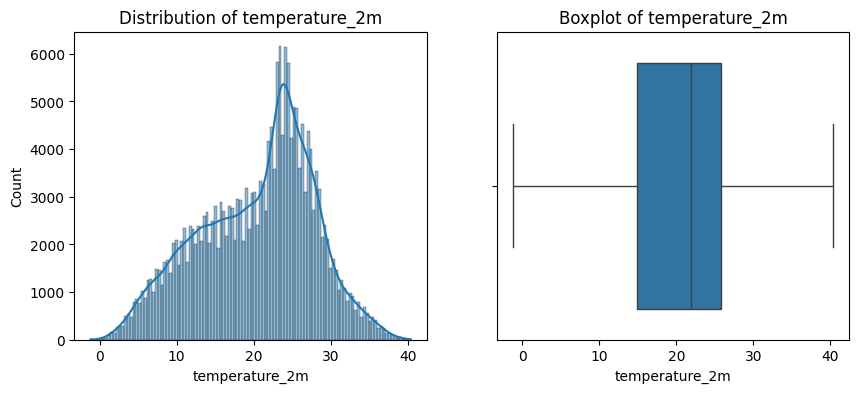

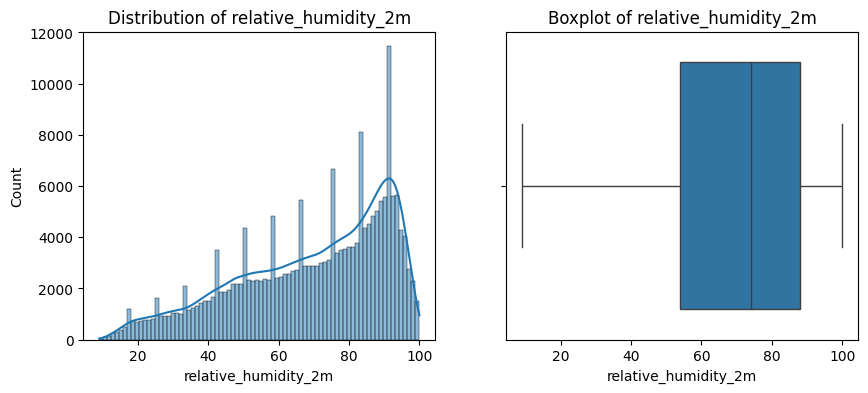

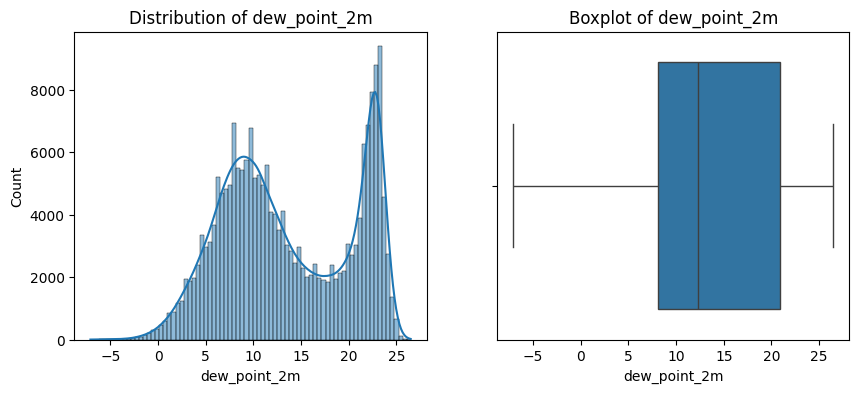

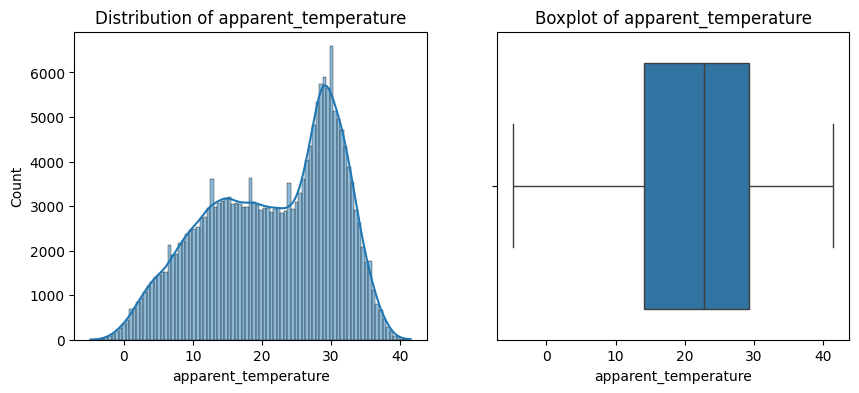

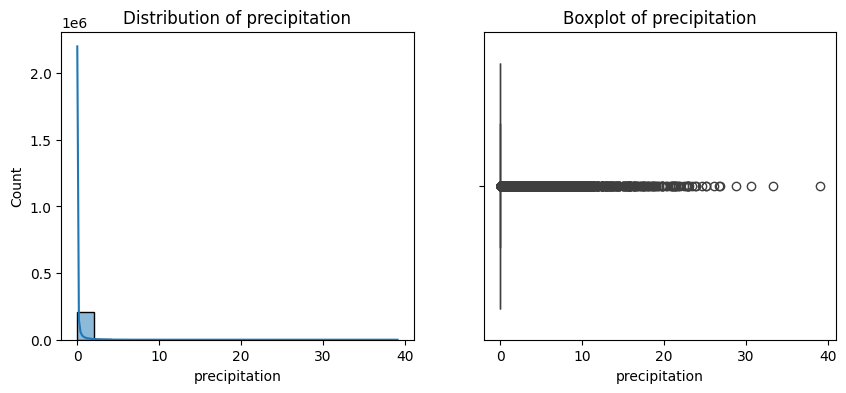

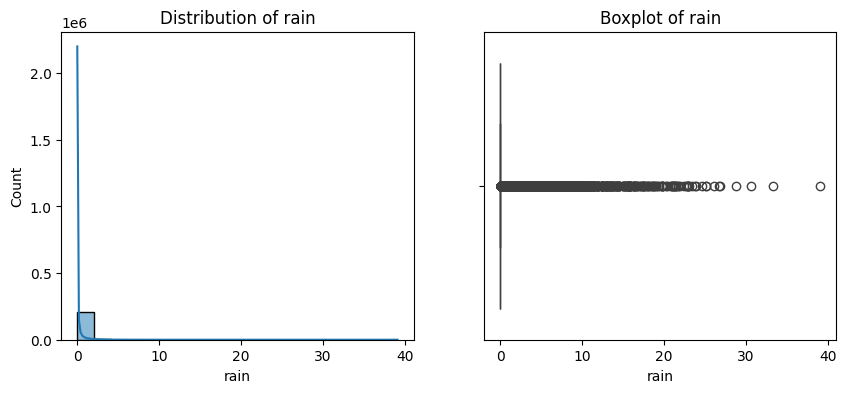

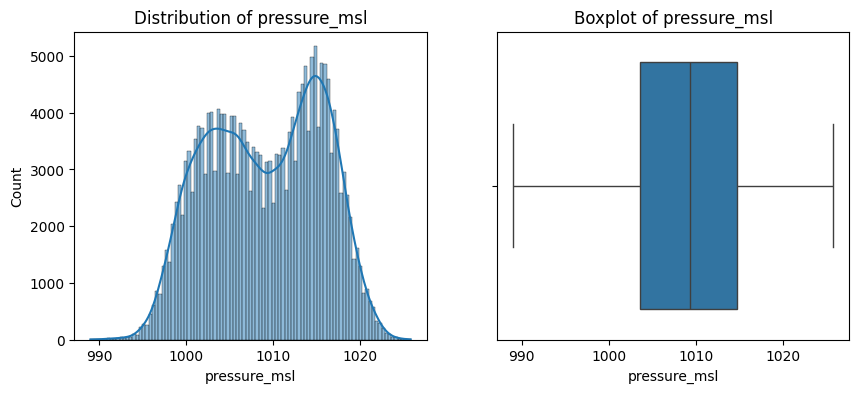

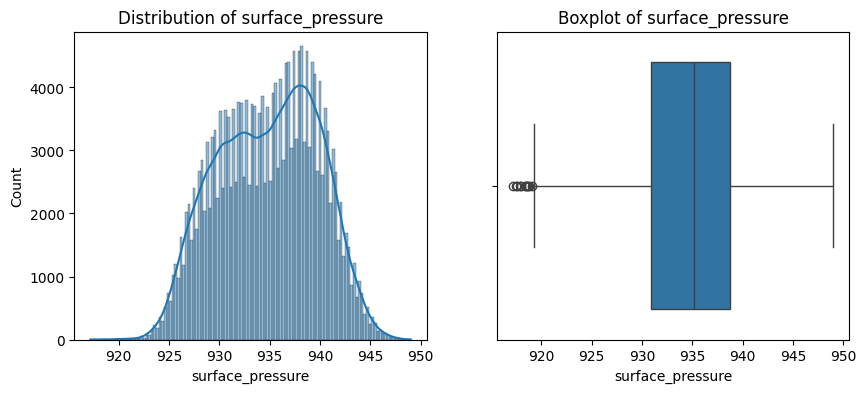

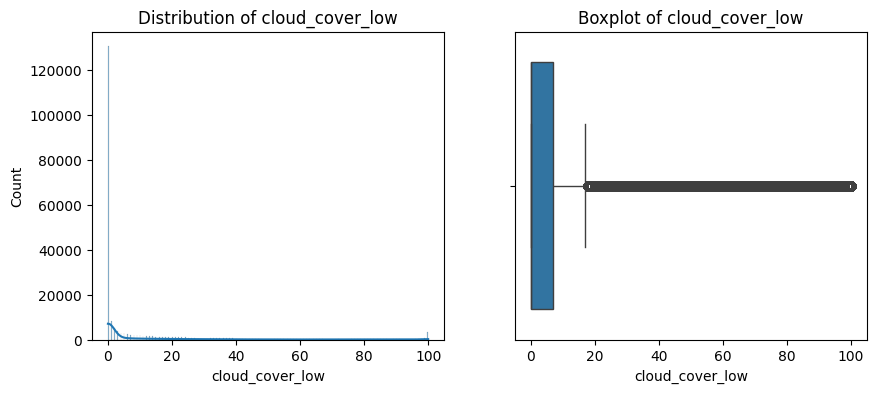

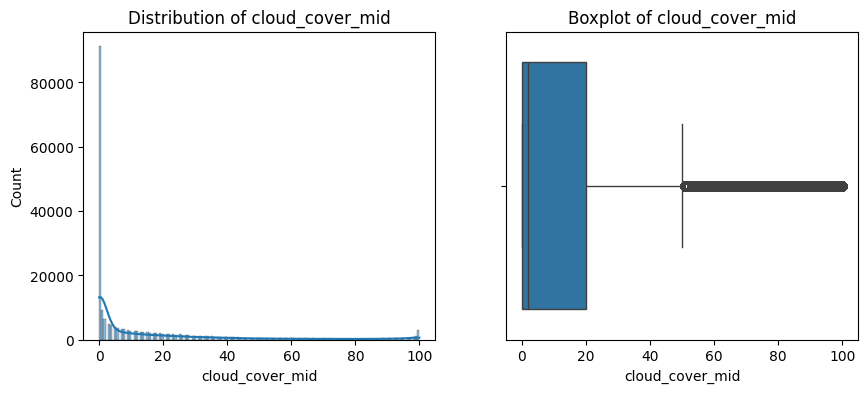

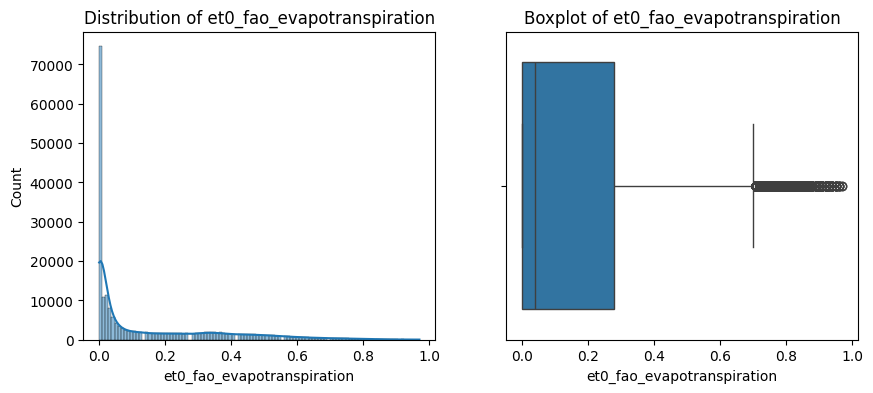

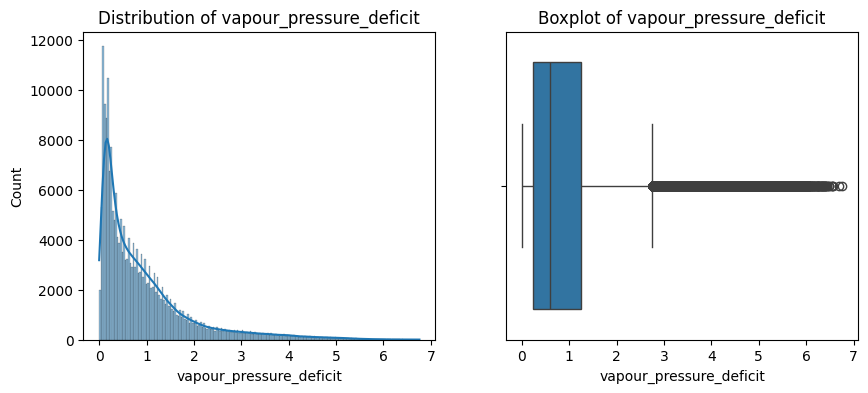

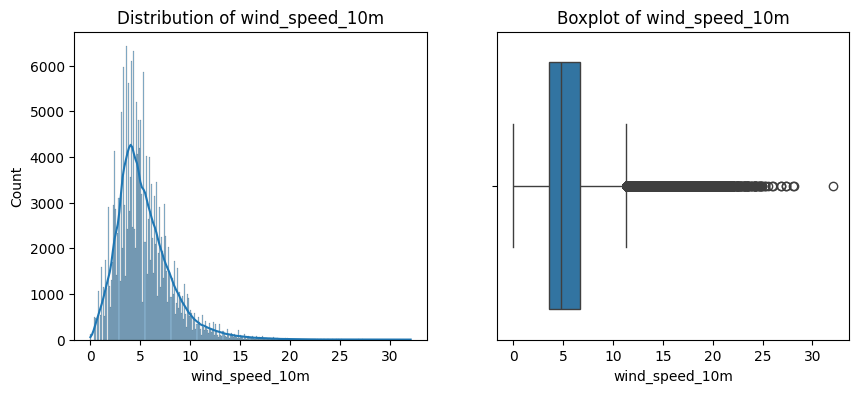

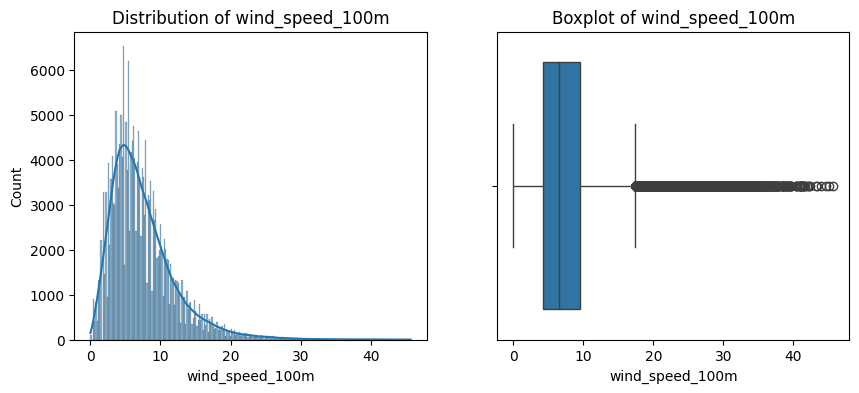

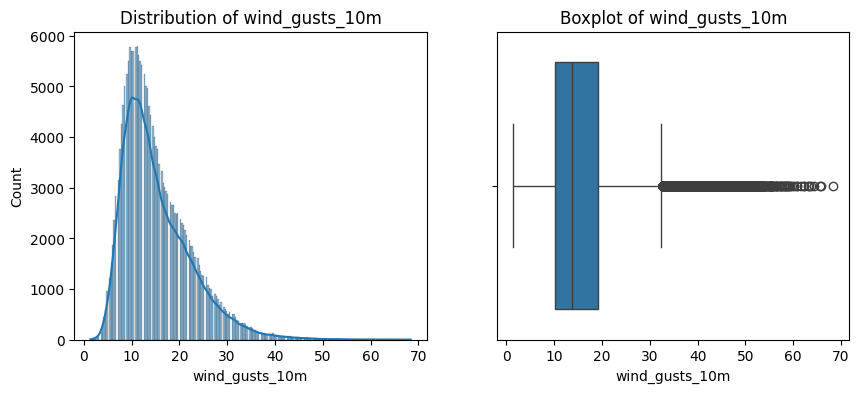

In [11]:
# Plotting histograms and boxplots
for column in df_hist01.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_hist01[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_hist01[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

Multivariate Analysis

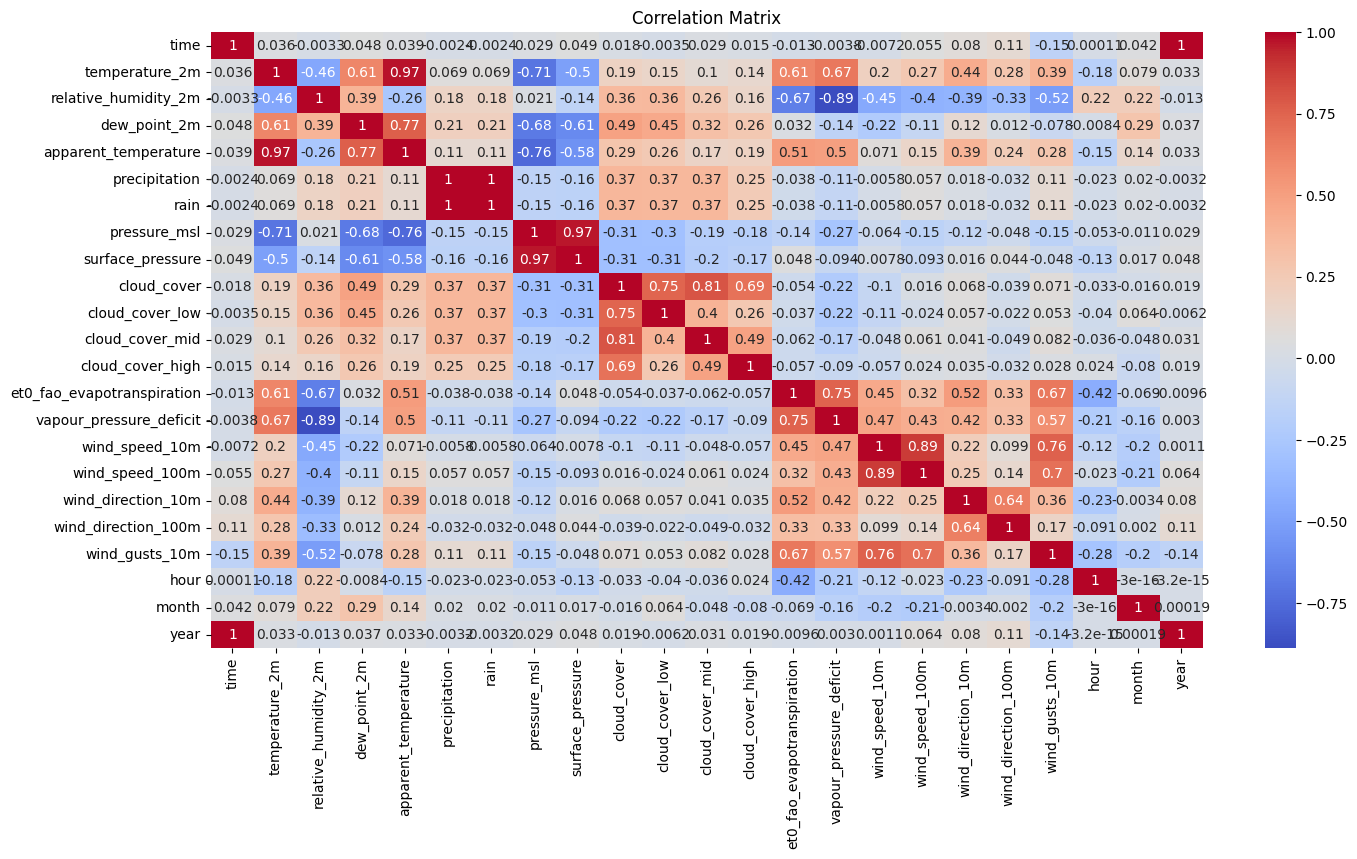

In [12]:
# Correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_hist.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Yearly Analysis for Climate Change

In [13]:
columns_to_plot = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'pressure_msl', 'surface_pressure', 'cloud_cover_low', 'cloud_cover_mid', 'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m']

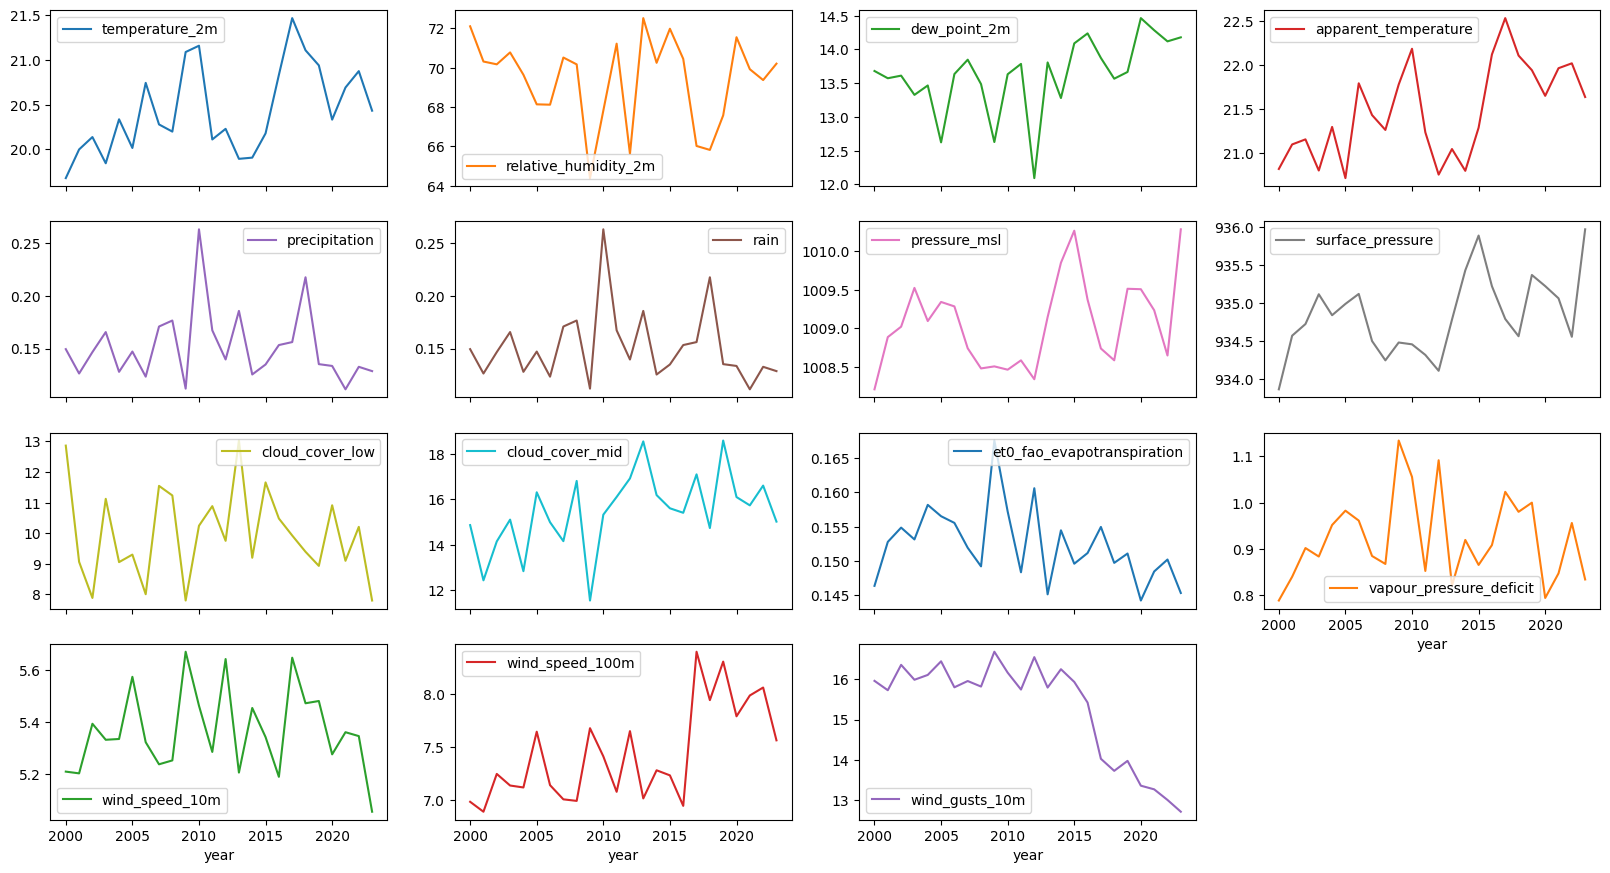

In [14]:
yearly_data = df_hist01.groupby('year').mean()

yearly_data[columns_to_plot].plot(figsize=(20, 16), subplots=True, layout=(6, 4))
plt.show()

Seasonality Analysis

Recent Cloudburst Occurence: 12th May 2021 in Uttrakhand (reported in Chamoli and Tehri districts)

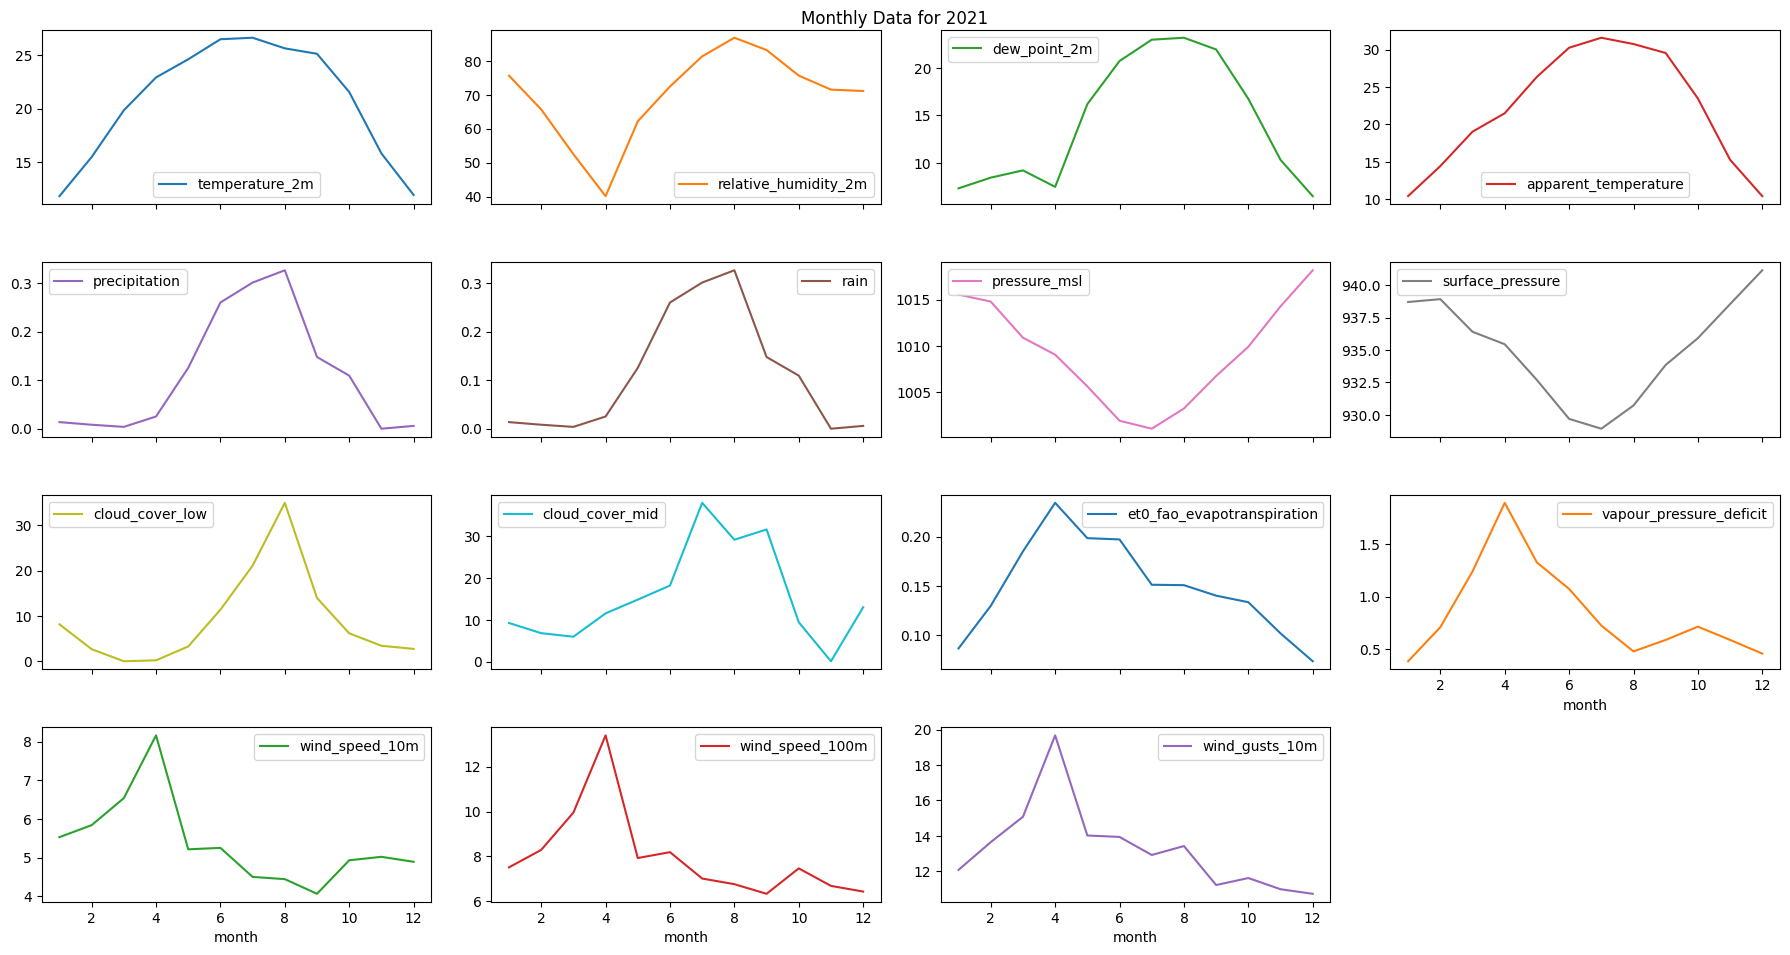

In [15]:
year = 2021
df_hist02 = df_hist01[df_hist01['year'] == year]

monthly_data = df_hist02.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for {year}')
plt.tight_layout()
plt.show()

Zooming onto months

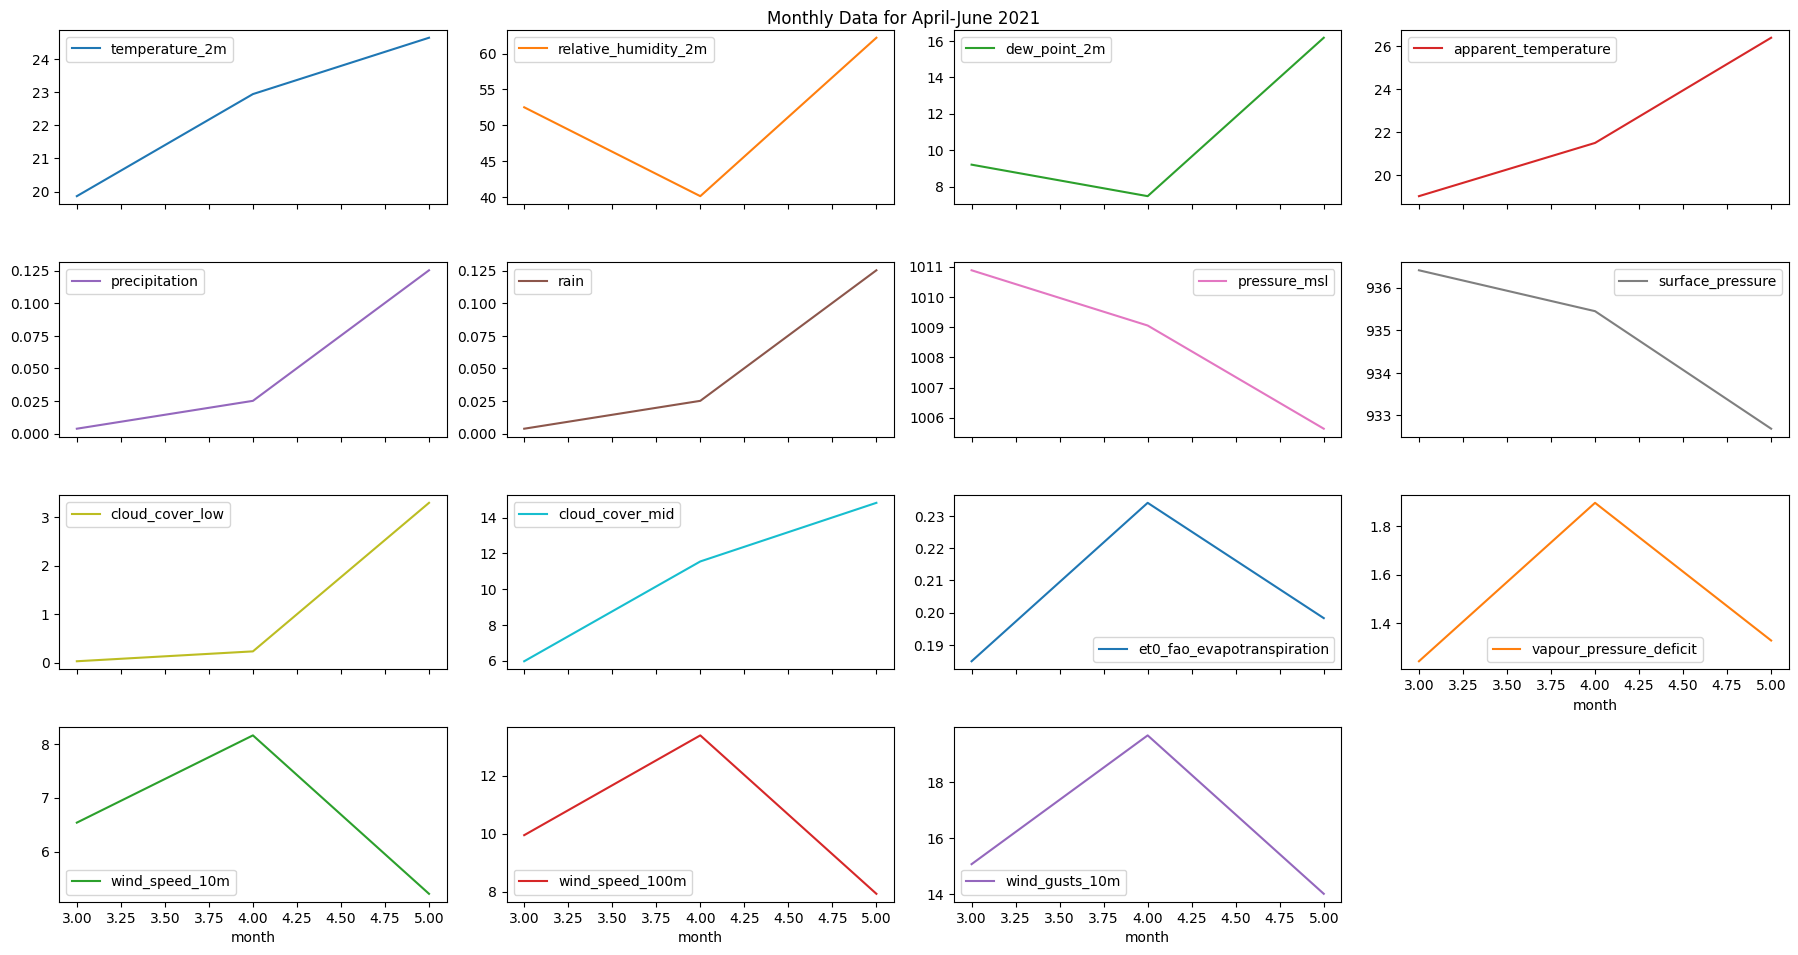

In [16]:
target_months = [3, 4, 5]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for April-June {year}')
plt.tight_layout()
plt.show()

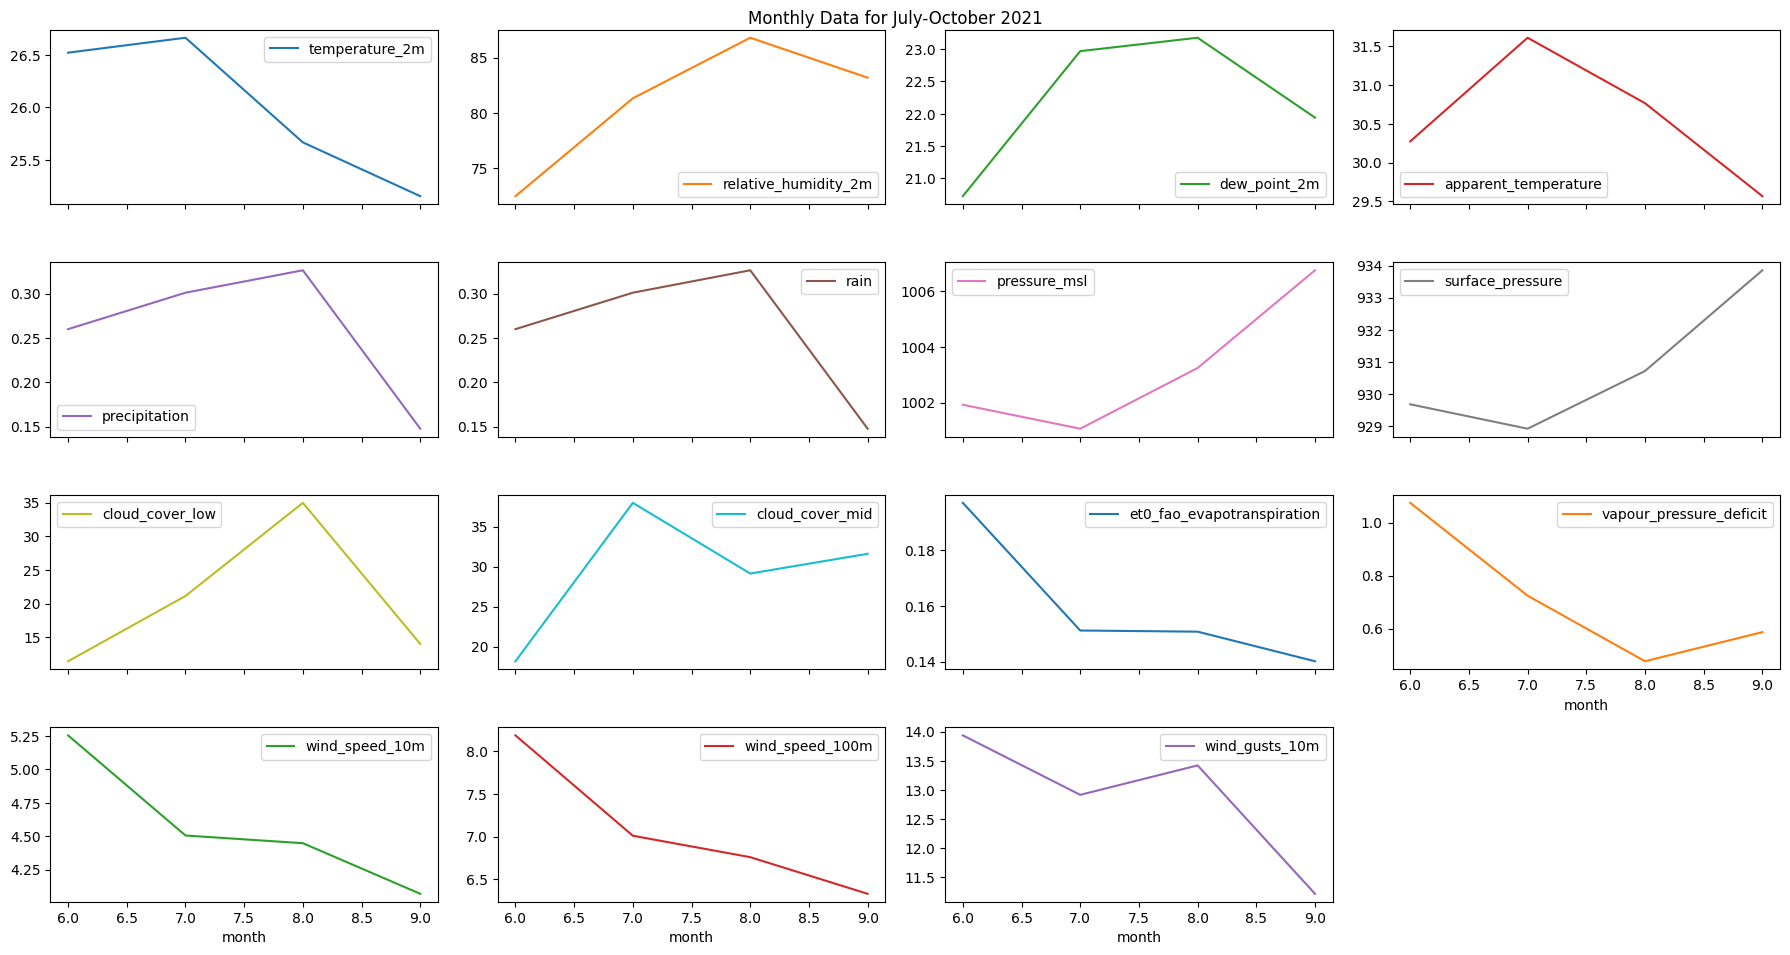

In [17]:
target_months = [6, 7, 8, 9]
df_target_months = df_hist02[df_hist02['month'].isin(target_months)]

monthly_data = df_target_months.groupby('month').mean()

monthly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Monthly Data for July-October {year}')
plt.tight_layout()
plt.show()

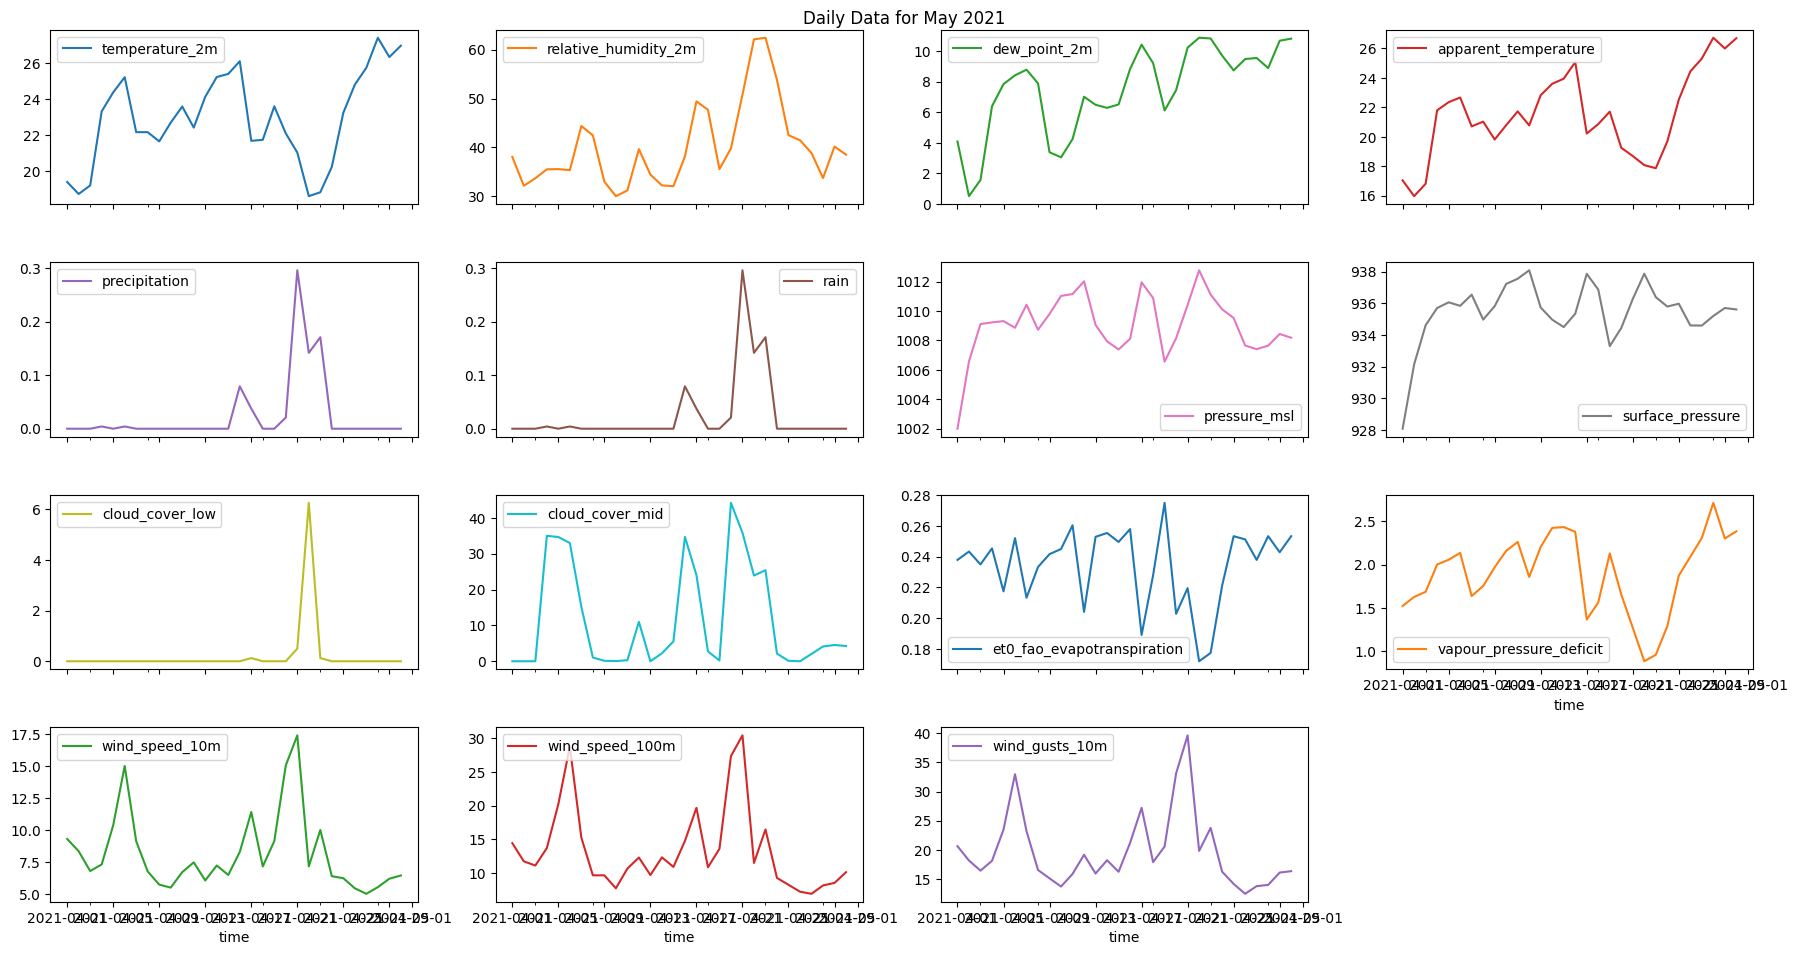

In [18]:
df_april = df_hist02[df_hist02['month'] == 4]
hourly_data = df_april.groupby(df_april['time'].dt.date).mean()

hourly_data[columns_to_plot].plot(figsize=(18, 14), subplots=True, layout=(6, 4), title=f'Daily Data for May {year}')
plt.tight_layout()
plt.show()

In [19]:
df_hist01.head(2)

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,pressure_msl,surface_pressure,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m,hour,month,year
0,2000-01-01 00:00:00,4.0,96,3.3,1.9,0.0,0.0,1017.5,938.5,0,0,0.0,0.04,3.8,3.6,11.5,0,1,2000
1,2000-01-01 01:00:00,4.1,95,3.3,1.9,0.0,0.0,1017.9,938.9,0,1,0.0,0.04,4.1,4.4,11.9,1,1,2000


In [20]:
df_hist03 = df_hist01.drop(['apparent_temperature', 'pressure_msl', 'surface_pressure'], axis='columns')
df_hist03

,time,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m,hour,month,year
0,2000-01-01 00:00:00,4.0,96,3.3,0.0,0.0,0,0,0.00,0.04,3.8,3.6,11.5,0,1,2000
1,2000-01-01 01:00:00,4.1,95,3.3,0.0,0.0,0,1,0.00,0.04,4.1,4.4,11.9,1,1,2000
2,2000-01-01 02:00:00,4.0,95,3.2,0.0,0.0,0,1,0.01,0.04,3.8,4.5,11.9,2,1,2000
3,2000-01-01 03:00:00,6.5,92,5.3,0.0,0.0,0,3,0.02,0.07,4.3,4.0,13.0,3,1,2000
4,2000-01-01 04:00:00,12.9,75,8.6,0.0,0.0,0,0,0.13,0.37,2.0,2.5,13.0,4,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2023-12-31 19:00:00,8.6,87,6.5,0.0,0.0,0,0,0.00,0.15,7.5,7.5,9.7,19,12,2023
210380,2023-12-31 20:00:00,8.7,85,6.4,0.0,0.0,0,0,0.00,0.16,8.2,9.3,11.2,20,12,2023
210381,2023-12-31 21:00:00,8.6,86,6.5,0.0,0.0,0,0,0.00,0.15,7.2,10.4,11.5,21,12,2023
210382,2023-12-31 22:00:00,8.2,86,6.1,0.0,0.0,0,0,0.00,0.15,8.2,10.9,11.5,22,12,2023


In [21]:
df_hist03.describe()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,cloud_cover_low,cloud_cover_mid,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_gusts_10m,hour,month,year
count,210384,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000,210384.000000
mean,2011-12-31 23:30:00,20.436684,69.367124,13.623561,0.151247,0.151242,9.976082,15.457611,0.152360,0.922731,5.364997,7.434976,15.281371,11.500000,6.522930,2011.498973
min,2000-01-01 00:00:00,-1.200000,9.000000,-7.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.000000,1.000000,2000.000000
25%,2005-12-31 11:45:00,14.900000,54.000000,8.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,3.600000,4.200000,10.100000,5.750000,4.000000,2005.000000
50%,2011-12-31 23:30:00,21.900000,74.000000,12.300000,0.000000,0.000000,0.000000,2.000000,0.040000,0.600000,4.800000,6.500000,13.700000,11.500000,7.000000,2011.500000
75%,2017-12-31 11:15:00,25.800000,88.000000,20.900000,0.000000,0.000000,7.000000,20.000000,0.280000,1.240000,6.700000,9.500000,19.100000,17.250000,10.000000,2017.000000
max,2023-12-31 23:00:00,40.400000,100.000000,26.500000,39.100000,39.100000,100.000000,100.000000,0.970000,6.760000,32.100000,45.700000,68.400000,23.000000,12.000000,2023.000000
std,NaN,7.438316,21.302657,6.806465,0.769278,0.769266,21.941953,25.201355,0.202741,0.976963,2.772204,4.604150,7.116790,6.922203,3.448711,6.922252


# Feature Engineering

In [22]:
columns_to_apply = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 
    'precipitation', 'rain', 'cloud_cover_low', 'cloud_cover_mid', 
    'et0_fao_evapotranspiration', 'vapour_pressure_deficit', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m'
]